**MIS 64061 - Assignment 01 - Neural Networks**
Tejasvini Mavuleti - 10/02/2022


---
Abstract

In this assignment we are going to look at the IMBD dataset which has 50,000 reviews from the Internet Movie Database. We split them into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Also, this dataset has an inbuilt package Keras. It has been preprocessed: the reviews that are the sequences of words which have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. 


---
Summary - we saw that  

1. When 2 hidden layers are used with 16 neurons in each layer: The accuracy of the training set and validation keeps increasing until 6 epochs, and after that, the training accuracy keeps increasing, whereas the validation accuracy keeps decreasing, which means that the model starts overfitting. So, we trained the model again with 6 epochs and applied the model to the test set to achieve the maximum accuracy of 87.71%

2. When 1 or 3 hidden layers are used instead of 2 hidden layers without changing any other hyperparameters: There is a very minute change in validation and test accuracy, but no particular trend is observed. We found that increasing the number of hidden layers from 1 to 3 had no effect on loss function accuracy or deflection. So, the data on which the model is implemented achieved saturation in accuracy in the very beginning, i.e., at the first layer, and no further increase in accuracy is possible for the given data set.

3. When we kept increasing the no. of neurons in each layer: We kept increasing the No. of hidden units in each layer to 32, 64, 128, 256, and 512 without changing any other hyperparameters. The Validation accuracy kept increasing with the addition of neurons in the hidden layers, whereas no improvement was observed in Test accuracy. This means we are tuning the hyperparameters to improve the validation accuracy. Still, no other generalization is observed from the model as the Test accuracy is not improving.

4. When the MSE loss function is used instead of binary-cross-entropy: There is a very minute decrease (about 0.5%) in both Validation and Test accuracy which means Binary cross_entropy is better compared to the MSE loss function for the given dataset.This shows that when MSE is used as the loss function for the IMDB dataset, the loss value is minimal when compared to binary cross entropy.

5. When the activation function is used instead of relu: There is a very slight decrease in Validation accuracy, whereas no change is observed in the Test accuracy. This lowers performance and vanishes the gradient problem.

There is one point of stop here; from the above observations, we can infer that the Activation function relu and Loss function Binary cross-entropy are the best hyperparameters for the given dataset.

When we tried to regularize the model using the dropout technique: No change in Validation and Test accuracy was used though the maximum value (p=1) was used in the model. The dropout also helps in getting a smaller loss function but has no effect on accuracy. So, dropout is not adding any advantage in generalizing the model for the given data. 

But when the learning rate is changed to 0.01 from 0.001 while using the dropout optimizer, we can achieve the maximum validation and Test accuracy at 99 epochs. After this, the model starts overfitting.

**Conclusion**: By using different hyperparameters like different no. of hidden layers, number of neurons in each layer, changing the loss functions, changing the optimizers, and using the regularization technique dropout, the maximum Test accuracy is almost the same.


In [12]:
# Importing the data and taking only 10,000 most frequently words from the total words of 85,000.

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [13]:
# Let's see one of the reviews from training data which is in the form of an array of digits.

train_data[179]

[1,
 1230,
 5329,
 299,
 2130,
 2733,
 3994,
 7073,
 1697,
 5,
 4327,
 686,
 336,
 8,
 289,
 539,
 33,
 6,
 1058,
 223,
 2,
 2130,
 892,
 27,
 404,
 255,
 64,
 8,
 169,
 46,
 15,
 59,
 9,
 11,
 6,
 649,
 19,
 27,
 597,
 10,
 10,
 803,
 6,
 132,
 8,
 81,
 10,
 10,
 13,
 247,
 423,
 2130,
 11,
 147,
 113,
 21,
 13,
 62,
 838,
 4,
 1023,
 42,
 900,
 7,
 14,
 509,
 9,
 170,
 8,
 30,
 180,
 8,
 726,
 25,
 26,
 1688,
 8,
 1779,
 1230,
 5329,
 395,
 6,
 173,
 2375,
 730,
 5,
 6075,
 247,
 74,
 170,
 143,
 4,
 3826,
 212,
 1102,
 15,
 28,
 93,
 90,
 38,
 1112,
 48,
 25,
 566,
 1779,
 12,
 1092,
 24,
 79,
 1393,
 80,
 30,
 367,
 303,
 11,
 4,
 291,
 21,
 18,
 4,
 1853,
 13,
 197,
 29,
 16,
 55,
 52,
 10,
 10,
 2130,
 11,
 147,
 113,
 517,
 125,
 40,
 129,
 801,
 5827,
 1139,
 223,
 453,
 21,
 12,
 214,
 2805,
 5,
 2805,
 17,
 12,
 271,
 367,
 5,
 2,
 4185,
 19,
 27,
 904,
 3418,
 45,
 24,
 2,
 204,
 21,
 48,
 25,
 64,
 219,
 102,
 19,
 204,
 1008,
 1360,
 2,
 62,
 30,
 55,
 2,
 849,
 586,
 36,


In [14]:
# Let's see the label of the above review.
train_labels[179]


1

The review is positive

In [ ]:
# Because we restricted ourselves to the top 10,000 most frequent words among 85,500 words availabele, the word limit will not exceed 10,000

max([max(sequence) for sequence in train_data])

9999

In [15]:
# Decode one of these reviews back to english words as in a dictionary and map words to an integer index
word_index = imdb.get_word_index()

# Then reverse it, mapping integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; note that our indices were offset by 3 because 0, 1 and 2 are reserved indices for padding, start of sequence, and unknown.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[179]])

In [ ]:
decoded_review

# We saw that this was a Negative review as it was labeled as '0' and I'm sure that it's labeled correctly after going through the decoded review as below.Lol

"? i also having endured hundreds of children's movies in the past consider this to be one of the worst i have ever seen br br 1 i ? in this day and age having to explain to my children that russia is not the bad guys also that mocking russian names like ? is inappropriate br br 2 the grandfather ? birthday party scene contained a quasi sexist joke in which he implied that males drink beer and women talk on the phone two other flies also needlessly use the word crap twice br br 3 the whole movie largely ? of 1950's stereotypes and propaganda that i thought we as a nation were proud to have ? above br br in all it's just crude badly animated even more badly written and not worth wasting the time to view"

DATA PREPARATION

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer )

We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
# Let's see a reveiw that is one-hot-encoded

x_train[121]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorizing the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In the input data, we only have vectors, and our labels are scalars (1s and 0s). A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations: Dense(16, activation='relu') Having 16 hidden units means that the weight matrix W will have shape (input_dimension, 16), i.e., the dot product with W will project the input data onto a 16-dimensional representation space (and then we would add the bias vector b and apply the relu operation).

We can intuitively understand the dimensionality of our representation space and how much freedom we allow the network to have when learning internal representations. More hidden units (a higher-dimensional representation space) enable our network to learn more complex representations. Still, it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).




In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

LOSS FUNCTION

Since we are facing a binary classification problem and the output of our network is a probability we end our network with a single-unit layer with a sigmoid activation, is it best to use the binary_crossentropy loss?

Of course, it isn't the only viable choice: you could use, for instance, MSE. But cross-entropy is usually the best choice when dealing with models that output probabilities. Cross entropy is a quantity from the Information Theory field that measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and our predictions.

In [ ]:


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])


Validating our approach
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 131ms/step - loss: 0.4964 - binary_accuracy: 0.8016 - val_loss: 0.3715 - val_binary_accuracy: 0.8721
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2990 - binary_accuracy: 0.9033 - val_loss: 0.2984 - val_binary_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2181 - binary_accuracy: 0.9301 - val_loss: 0.2890 - val_binary_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1700 - binary_accuracy: 0.9466 - val_loss: 0.2860 - val_binary_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1365 - binary_accuracy: 0.9581 - val_loss: 0.2842 - val_binary_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1138 - binary_accuracy: 0.9646 - val_loss: 0.3078 - val_binary_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - lo

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

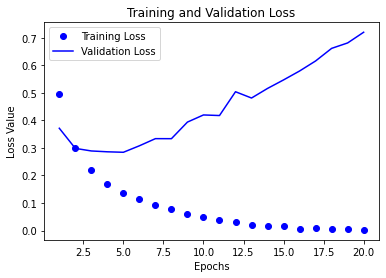

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

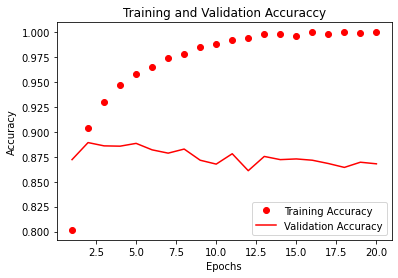

In [ ]:
# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see that the validation accuracy increases upto 6 epochs (Validation acc = 88.96%) and starts decreasing afetr that which means that the model starts overfitting after 6 epochs.

Let's train a new network from scratch for six epochs, then evaluate it on our test data:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
49/49 [==============================] - 1s 16ms/step - loss: 0.4731 - accuracy: 0.8264
Epoch 2/6
49/49 [==============================] - 1s 15ms/step - loss: 0.2691 - accuracy: 0.9069
Epoch 3/6
49/49 [==============================] - 1s 15ms/step - loss: 0.2069 - accuracy: 0.9270
Epoch 4/6
49/49 [==============================] - 1s 15ms/step - loss: 0.1735 - accuracy: 0.9397
Epoch 5/6
49/49 [==============================] - 1s 15ms/step - loss: 0.1499 - accuracy: 0.9479
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.3365 - accuracy: 0.8747


In [ ]:
results

# So, we acheived an accuracy of 87.8% using two hidden layers with 16 neurons in each layer

[0.33653128147125244, 0.8747199773788452]

In [ ]:
#Using the trained network to generate predictions on new data

model.predict(x_test)

#Note: The results below gives the probability of each reveiw being "Positive"

array([[0.1088188 ],
       [0.99991643],
       [0.23195711],
       ...,
       [0.09329462],
       [0.02919754],
       [0.5043107 ]], dtype=float32)

PART 1 - USING 1 OR 3 HIDDEN LAYERS

Epoch 1/20
30/30 [==============================] - 5s 142ms/step - loss: 0.5169 - binary_accuracy: 0.7928 - val_loss: 0.4081 - val_binary_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3356 - binary_accuracy: 0.8987 - val_loss: 0.3350 - val_binary_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2573 - binary_accuracy: 0.9235 - val_loss: 0.2947 - val_binary_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2124 - binary_accuracy: 0.9347 - val_loss: 0.2805 - val_binary_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1801 - binary_accuracy: 0.9459 - val_loss: 0.2732 - val_binary_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1549 - binary_accuracy: 0.9533 - val_loss: 0.2730 - val_binary_accuracy: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - lo

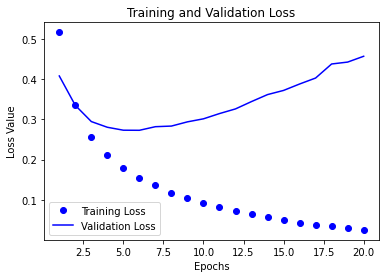

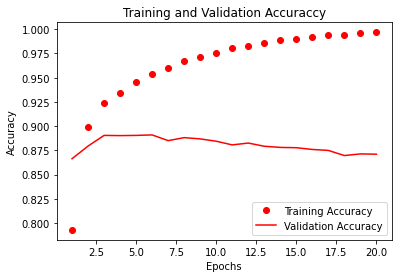

Epoch 1/6
49/49 [==============================] - 2s 15ms/step - loss: 0.4551 - accuracy: 0.8264
Epoch 2/6
49/49 [==============================] - 1s 15ms/step - loss: 0.2811 - accuracy: 0.9072
Epoch 3/6
49/49 [==============================] - 1s 16ms/step - loss: 0.2217 - accuracy: 0.9253
Epoch 4/6
49/49 [==============================] - 1s 15ms/step - loss: 0.1900 - accuracy: 0.9357
Epoch 5/6
49/49 [==============================] - 1s 15ms/step - loss: 0.1661 - accuracy: 0.9438
Epoch 6/6
782/782 [==============================] - 3s 3ms/step - loss: 0.2998 - accuracy: 0.8803


[0.29980161786079407, 0.8802800178527832]

In [ ]:
#1) Using 1 hidden layer in the model
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results


Using 3 hidden layers

Epoch 1/20
30/30 [==============================] - 8s 188ms/step - loss: 0.5717 - binary_accuracy: 0.7425 - val_loss: 0.4378 - val_binary_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3357 - binary_accuracy: 0.8977 - val_loss: 0.3167 - val_binary_accuracy: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2227 - binary_accuracy: 0.9273 - val_loss: 0.2839 - val_binary_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1686 - binary_accuracy: 0.9449 - val_loss: 0.3306 - val_binary_accuracy: 0.8719
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1337 - binary_accuracy: 0.9545 - val_loss: 0.3161 - val_binary_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1009 - binary_accuracy: 0.9679 - val_loss: 0.4631 - val_binary_accuracy: 0.8515
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - lo

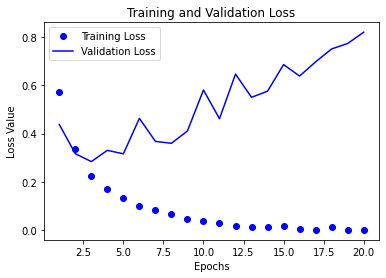

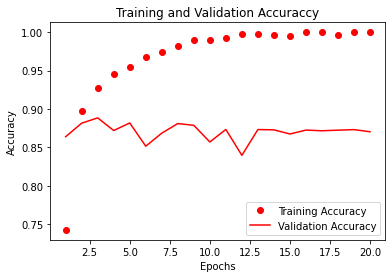

Epoch 1/6
49/49 [==============================] - 3s 17ms/step - loss: 0.4314 - accuracy: 0.8219
Epoch 2/6
49/49 [==============================] - 1s 18ms/step - loss: 0.2470 - accuracy: 0.9076
Epoch 3/6
49/49 [==============================] - 1s 17ms/step - loss: 0.1959 - accuracy: 0.9270
Epoch 4/6
49/49 [==============================] - 1s 17ms/step - loss: 0.1655 - accuracy: 0.9394
Epoch 5/6
49/49 [==============================] - 1s 18ms/step - loss: 0.1430 - accuracy: 0.9480
Epoch 6/6
782/782 [==============================] - 4s 4ms/step - loss: 0.3556 - accuracy: 0.8716


[0.35559946298599243, 0.8715599775314331]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

PART 2 - USING MULTIPLE NEURONS

Using 2 hidden layers with 32 neurons in each layer

Epoch 1/20
30/30 [==============================] - 4s 112ms/step - loss: 0.4777 - binary_accuracy: 0.7887 - val_loss: 0.3577 - val_binary_accuracy: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2682 - binary_accuracy: 0.9076 - val_loss: 0.3024 - val_binary_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1906 - binary_accuracy: 0.9335 - val_loss: 0.2889 - val_binary_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1561 - binary_accuracy: 0.9445 - val_loss: 0.3879 - val_binary_accuracy: 0.8558
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1219 - binary_accuracy: 0.9575 - val_loss: 0.3394 - val_binary_accuracy: 0.8750
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0975 - binary_accuracy: 0.9683 - val_loss: 0.3499 - val_binary_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - lo

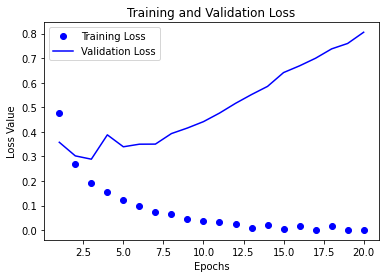

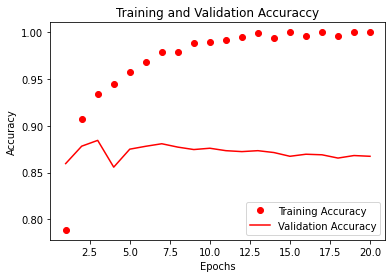

Epoch 1/6
49/49 [==============================] - 2s 19ms/step - loss: 0.4200 - accuracy: 0.8225
Epoch 2/6
49/49 [==============================] - 1s 20ms/step - loss: 0.2396 - accuracy: 0.9121
Epoch 3/6
49/49 [==============================] - 1s 18ms/step - loss: 0.1867 - accuracy: 0.9313
Epoch 4/6
49/49 [==============================] - 1s 19ms/step - loss: 0.1560 - accuracy: 0.9423
Epoch 5/6
49/49 [==============================] - 1s 21ms/step - loss: 0.1346 - accuracy: 0.9505
Epoch 6/6
782/782 [==============================] - 3s 3ms/step - loss: 0.3720 - accuracy: 0.8696


[0.3719937205314636, 0.8695999979972839]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Using 2 hidden layers with 64 neurons in each hidden layer

Epoch 1/20
30/30 [==============================] - 5s 124ms/step - loss: 0.4727 - binary_accuracy: 0.7893 - val_loss: 0.4668 - val_binary_accuracy: 0.7832
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2635 - binary_accuracy: 0.8995 - val_loss: 0.2782 - val_binary_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1869 - binary_accuracy: 0.9322 - val_loss: 0.2891 - val_binary_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1452 - binary_accuracy: 0.9477 - val_loss: 0.3012 - val_binary_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1140 - binary_accuracy: 0.9590 - val_loss: 0.3507 - val_binary_accuracy: 0.8707
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0880 - binary_accuracy: 0.9704 - val_loss: 0.3448 - val_binary_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - lo

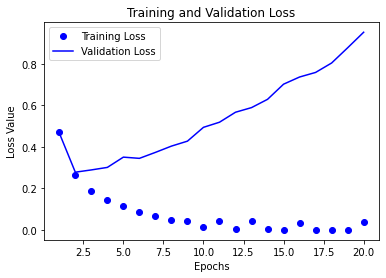

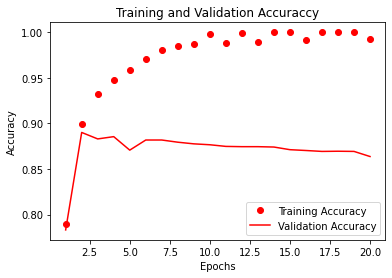

Epoch 1/6
49/49 [==============================] - 2s 28ms/step - loss: 0.4126 - accuracy: 0.8124
Epoch 2/6
49/49 [==============================] - 1s 27ms/step - loss: 0.2399 - accuracy: 0.9065
Epoch 3/6
49/49 [==============================] - 1s 27ms/step - loss: 0.1825 - accuracy: 0.9305
Epoch 4/6
49/49 [==============================] - 1s 30ms/step - loss: 0.1457 - accuracy: 0.9450
Epoch 5/6
49/49 [==============================] - 2s 31ms/step - loss: 0.1086 - accuracy: 0.9604
Epoch 6/6
782/782 [==============================] - 4s 4ms/step - loss: 0.4535 - accuracy: 0.8584


[0.4535001814365387, 0.8584399819374084]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Using 2 hidden layers with 128 neurons in each hidden layer

Epoch 1/20
30/30 [==============================] - 12s 402ms/step - loss: 0.4925 - binary_accuracy: 0.7669 - val_loss: 0.3164 - val_binary_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2609 - binary_accuracy: 0.8999 - val_loss: 0.3420 - val_binary_accuracy: 0.8594
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1794 - binary_accuracy: 0.9327 - val_loss: 0.2911 - val_binary_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 5s 187ms/step - loss: 0.1294 - binary_accuracy: 0.9529 - val_loss: 0.3034 - val_binary_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0938 - binary_accuracy: 0.9680 - val_loss: 0.3420 - val_binary_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0769 - binary_accuracy: 0.9789 - val_loss: 0.3503 - val_binary_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - 

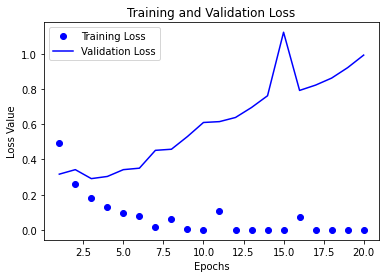

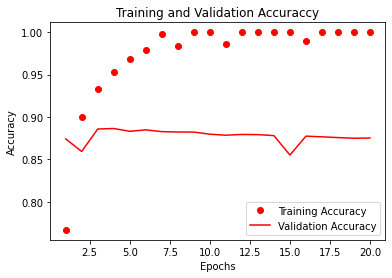

Epoch 1/6
49/49 [==============================] - 3s 44ms/step - loss: 0.4286 - accuracy: 0.8098
Epoch 2/6
49/49 [==============================] - 2s 36ms/step - loss: 0.2296 - accuracy: 0.9094
Epoch 3/6
49/49 [==============================] - 2s 36ms/step - loss: 0.1621 - accuracy: 0.9380
Epoch 4/6
49/49 [==============================] - 2s 36ms/step - loss: 0.1126 - accuracy: 0.9572
Epoch 5/6
49/49 [==============================] - 2s 35ms/step - loss: 0.0764 - accuracy: 0.9738
Epoch 6/6
782/782 [==============================] - 3s 3ms/step - loss: 0.4880 - accuracy: 0.8748


[0.4880313277244568, 0.8747599720954895]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Using 2 hidden layers with 256 neurons in each layer

Epoch 1/20
30/30 [==============================] - 7s 191ms/step - loss: 0.5096 - binary_accuracy: 0.7705 - val_loss: 0.3121 - val_binary_accuracy: 0.8806
Epoch 2/20
30/30 [==============================] - 3s 103ms/step - loss: 0.2563 - binary_accuracy: 0.9019 - val_loss: 0.3525 - val_binary_accuracy: 0.8476
Epoch 3/20
30/30 [==============================] - 3s 101ms/step - loss: 0.1735 - binary_accuracy: 0.9346 - val_loss: 0.2884 - val_binary_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 3s 102ms/step - loss: 0.1073 - binary_accuracy: 0.9643 - val_loss: 0.3228 - val_binary_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 3s 100ms/step - loss: 0.0873 - binary_accuracy: 0.9745 - val_loss: 0.3723 - val_binary_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 3s 104ms/step - loss: 0.0155 - binary_accuracy: 0.9961 - val_loss: 1.6455 - val_binary_accuracy: 0.7172
Epoch 7/20
30/30 [==============================] - 3s 99ms/step

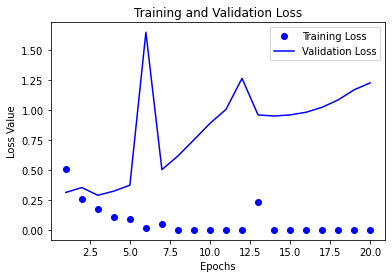

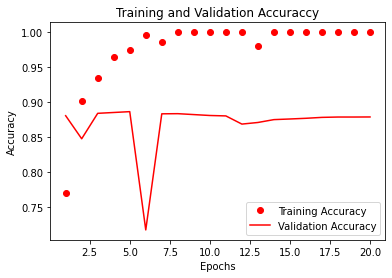

Epoch 1/6
49/49 [==============================] - 6s 81ms/step - loss: 0.4422 - accuracy: 0.8041
Epoch 2/6
49/49 [==============================] - 4s 84ms/step - loss: 0.2241 - accuracy: 0.9116
Epoch 3/6
49/49 [==============================] - 4s 83ms/step - loss: 0.1539 - accuracy: 0.9403
Epoch 4/6
49/49 [==============================] - 4s 80ms/step - loss: 0.0817 - accuracy: 0.9710
Epoch 5/6
49/49 [==============================] - 4s 82ms/step - loss: 0.0418 - accuracy: 0.9864
Epoch 6/6
782/782 [==============================] - 5s 6ms/step - loss: 0.5328 - accuracy: 0.8783


[0.532812237739563, 0.8783199787139893]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Using 2 hidden layers with 512 neurons in each layer

Epoch 1/20
30/30 [==============================] - 13s 415ms/step - loss: 0.5287 - binary_accuracy: 0.7639 - val_loss: 0.3199 - val_binary_accuracy: 0.8646
Epoch 2/20
30/30 [==============================] - 5s 183ms/step - loss: 0.2643 - binary_accuracy: 0.8953 - val_loss: 0.2980 - val_binary_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 5s 183ms/step - loss: 0.1477 - binary_accuracy: 0.9459 - val_loss: 0.3793 - val_binary_accuracy: 0.8604
Epoch 4/20
30/30 [==============================] - 5s 181ms/step - loss: 0.0727 - binary_accuracy: 0.9749 - val_loss: 0.5795 - val_binary_accuracy: 0.8426
Epoch 5/20
30/30 [==============================] - 5s 177ms/step - loss: 0.1045 - binary_accuracy: 0.9757 - val_loss: 0.3346 - val_binary_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 5s 178ms/step - loss: 0.0045 - binary_accuracy: 0.9993 - val_loss: 0.4817 - val_binary_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 5s 181ms/st

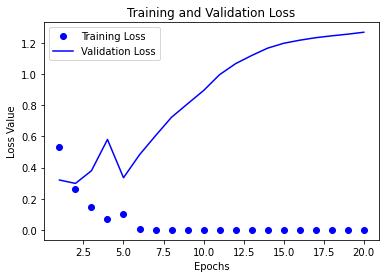

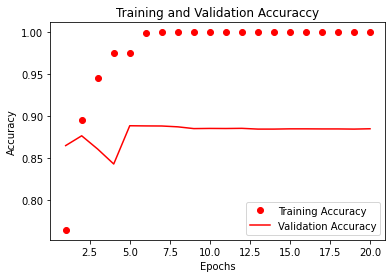

Epoch 1/6
49/49 [==============================] - 9s 144ms/step - loss: 0.4606 - accuracy: 0.7972
Epoch 2/6
49/49 [==============================] - 7s 151ms/step - loss: 0.2236 - accuracy: 0.9118
Epoch 3/6
49/49 [==============================] - 7s 150ms/step - loss: 0.1296 - accuracy: 0.9507
Epoch 4/6
49/49 [==============================] - 7s 147ms/step - loss: 0.0656 - accuracy: 0.9802
Epoch 5/6
49/49 [==============================] - 8s 154ms/step - loss: 0.0994 - accuracy: 0.9864
Epoch 6/6
782/782 [==============================] - 8s 10ms/step - loss: 0.7149 - accuracy: 0.8740


[0.7149271965026855, 0.873960018157959]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

PART 3 - MSE LOSS FUNCTION

Using MSE loss function instead of binary_crossentropy with 2 hidden layers and 64 neurons in each hidden layer

Epoch 1/20
30/30 [==============================] - 6s 170ms/step - loss: 0.1583 - binary_accuracy: 0.7683 - val_loss: 0.0974 - val_binary_accuracy: 0.8817
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0779 - binary_accuracy: 0.9031 - val_loss: 0.0862 - val_binary_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0560 - binary_accuracy: 0.9315 - val_loss: 0.0834 - val_binary_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0393 - binary_accuracy: 0.9541 - val_loss: 0.0832 - val_binary_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0311 - binary_accuracy: 0.9643 - val_loss: 0.0855 - val_binary_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0237 - binary_accuracy: 0.9737 - val_loss: 0.1029 - val_binary_accuracy: 0.8635
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - lo

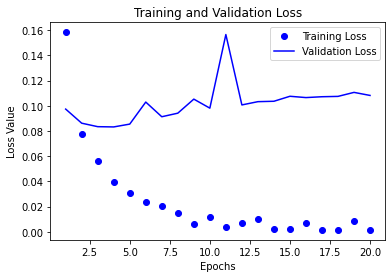

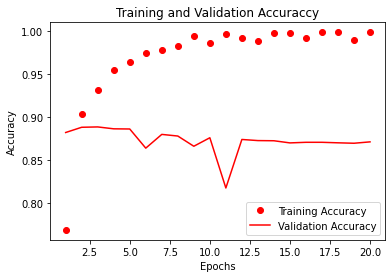

Epoch 1/4
49/49 [==============================] - 3s 29ms/step - loss: 0.1352 - accuracy: 0.8058
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.0714 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.0539 - accuracy: 0.9310
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.0979 - accuracy: 0.8698


[0.09790237993001938, 0.8697999715805054]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.MSE,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Using tanh activation function instead of relu ( 2 hidden layers with 64 neurons in each layer)

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.4572 - binary_accuracy: 0.7935 - val_loss: 0.2950 - val_binary_accuracy: 0.8842
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2308 - binary_accuracy: 0.9112 - val_loss: 0.2964 - val_binary_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1626 - binary_accuracy: 0.9371 - val_loss: 0.3018 - val_binary_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1395 - binary_accuracy: 0.9477 - val_loss: 0.3280 - val_binary_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1051 - binary_accuracy: 0.9625 - val_loss: 0.3623 - val_binary_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0810 - binary_accuracy: 0.9732 - val_loss: 0.4365 - val_binary_accuracy: 0.8728
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los

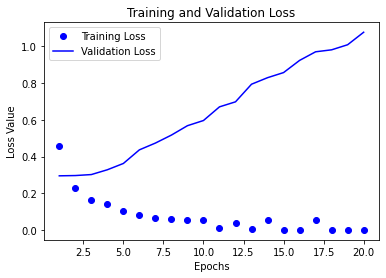

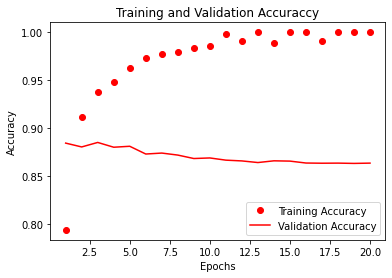

Epoch 1/6
49/49 [==============================] - 2s 22ms/step - loss: 0.4027 - accuracy: 0.8218
Epoch 2/6
49/49 [==============================] - 5s 109ms/step - loss: 0.2228 - accuracy: 0.9148
Epoch 3/6
49/49 [==============================] - 1s 21ms/step - loss: 0.1789 - accuracy: 0.9300
Epoch 4/6
49/49 [==============================] - 1s 20ms/step - loss: 0.1565 - accuracy: 0.9426
Epoch 5/6
49/49 [==============================] - 1s 20ms/step - loss: 0.1334 - accuracy: 0.9501
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.4016 - accuracy: 0.8636


[0.40164127945899963, 0.8635600209236145]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

PART 4 - TANH ACTIVATION

Using tanh activation function and MSE loss function with 2 hidden layers and 64 neurons in each layer

Epoch 1/20
30/30 [==============================] - 3s 77ms/step - loss: 0.1521 - binary_accuracy: 0.7835 - val_loss: 0.0912 - val_binary_accuracy: 0.8828
Epoch 2/20
30/30 [==============================] - 5s 160ms/step - loss: 0.0719 - binary_accuracy: 0.9068 - val_loss: 0.0961 - val_binary_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 2s 51ms/step - loss: 0.0493 - binary_accuracy: 0.9369 - val_loss: 0.0929 - val_binary_accuracy: 0.8743
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0405 - binary_accuracy: 0.9485 - val_loss: 0.0925 - val_binary_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0322 - binary_accuracy: 0.9611 - val_loss: 0.0991 - val_binary_accuracy: 0.8740
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0262 - binary_accuracy: 0.9686 - val_loss: 0.1082 - val_binary_accuracy: 0.8678
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - lo

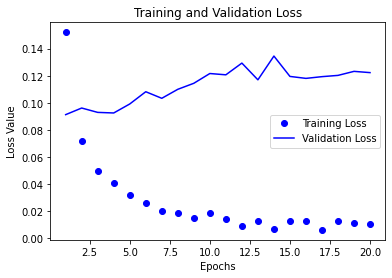

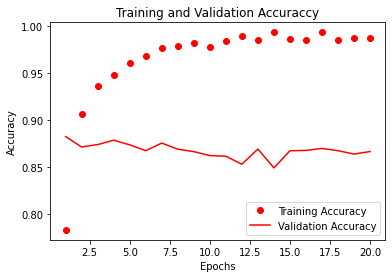

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.1285 - accuracy: 0.8186
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0671 - accuracy: 0.9131
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.0539 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.1063 - accuracy: 0.8633


[0.106318898499012, 0.8632799983024597]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.MSE,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

PART 5 - DROPOUT TECHNIQUE

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.4720 - binary_accuracy: 0.7823 - val_loss: 0.4153 - val_binary_accuracy: 0.8168
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2579 - binary_accuracy: 0.9051 - val_loss: 0.3215 - val_binary_accuracy: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1909 - binary_accuracy: 0.9288 - val_loss: 0.2778 - val_binary_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1484 - binary_accuracy: 0.9471 - val_loss: 0.3055 - val_binary_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1010 - binary_accuracy: 0.9671 - val_loss: 0.3230 - val_binary_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0811 - binary_accuracy: 0.9723 - val_loss: 0.4624 - val_binary_accuracy: 0.8538
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - los

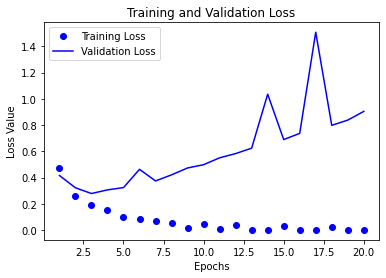

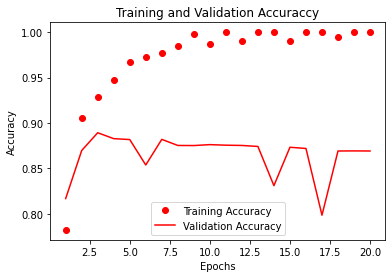

Epoch 1/6
49/49 [==============================] - 6s 36ms/step - loss: 0.4254 - accuracy: 0.8090
Epoch 2/6
49/49 [==============================] - 2s 35ms/step - loss: 0.2383 - accuracy: 0.9075
Epoch 3/6
49/49 [==============================] - 2s 32ms/step - loss: 0.1808 - accuracy: 0.9318
Epoch 4/6
49/49 [==============================] - 2s 31ms/step - loss: 0.1525 - accuracy: 0.9413
Epoch 5/6
49/49 [==============================] - 2s 33ms/step - loss: 0.1129 - accuracy: 0.9600
Epoch 6/6
782/782 [==============================] - 4s 4ms/step - loss: 0.3868 - accuracy: 0.8740


[0.3868147134780884, 0.8740000128746033]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Using 2 dropout layers (p=1) with 2 hidden layers of 64 neurons in each layer

Epoch 1/20
30/30 [==============================] - 6s 160ms/step - loss: 0.4781 - binary_accuracy: 0.7767 - val_loss: 0.3149 - val_binary_accuracy: 0.8846
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2598 - binary_accuracy: 0.9045 - val_loss: 0.2774 - val_binary_accuracy: 0.8905
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1904 - binary_accuracy: 0.9314 - val_loss: 0.2770 - val_binary_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1337 - binary_accuracy: 0.9520 - val_loss: 0.4381 - val_binary_accuracy: 0.8392
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1038 - binary_accuracy: 0.9639 - val_loss: 0.3214 - val_binary_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0779 - binary_accuracy: 0.9745 - val_loss: 0.3539 - val_binary_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - lo

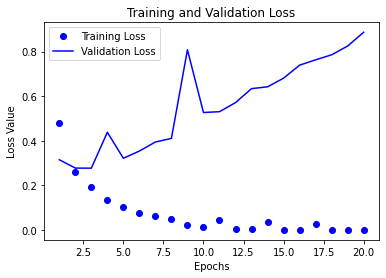

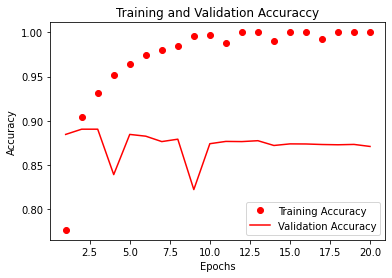

Epoch 1/6
49/49 [==============================] - 3s 31ms/step - loss: 0.4201 - accuracy: 0.8108
Epoch 2/6
49/49 [==============================] - 1s 28ms/step - loss: 0.2314 - accuracy: 0.9127
Epoch 3/6
49/49 [==============================] - 2s 32ms/step - loss: 0.1864 - accuracy: 0.9297
Epoch 4/6
49/49 [==============================] - 2s 31ms/step - loss: 0.1480 - accuracy: 0.9455
Epoch 5/6
49/49 [==============================] - 2s 31ms/step - loss: 0.1164 - accuracy: 0.9578
Epoch 6/6
782/782 [==============================] - 3s 3ms/step - loss: 0.4003 - accuracy: 0.8681


[0.40027105808258057, 0.8680800199508667]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
layers.Dropout(1),
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(1),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
layers.Dropout(1),
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(1),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results